# Hoje, começaremos a tratar de algoritmos um pouco mais avançados. Começaremos falando de clusters, usando K-Means!

In [1]:
#Importando bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3> Sempre bom conhecer nossa base de dados antes de começar a trabalhar, certo? Dê uma olhada: 
    
https://raw.githubusercontent.com/gilvandrocesardemedeiros/GEDataScience/master/Codes/Data/INMET-Dados_Mensais_Natal_1968-2018.csv

In [2]:
#Lendo os dados
dataSet = pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/GEDataScience/master/Codes/Data/INMET-Dados_Mensais_Natal_1968-2018.csv",
                      sep=';')

In [3]:
#Visualizando cabeçalho dos dados
dataSet.head()

,Estacao,Data,Hora,DirecaoVento,VelocidadeVentoMedia,VelocidadeVentoMaximaMedia,EvaporacaoPiche,EvapoBHPotencial,EvapoBHReal,InsolacaoTotal,...,NumDiasPrecipitacao,PrecipitacaoTotal,PressaoNivelMarMedia,PressaoMedia,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia,VisibilidadeMedia,Unnamed: 20
0,82598,31/01/1968,0,14.0,3.182796,9.0,145.5,NaN,NaN,254.1,...,12.0,51.6,NaN,NaN,31.051613,25.340000,20.906667,81.750000,NaN,NaN
1,82598,29/02/1968,0,14.0,2.655172,9.0,134.9,NaN,NaN,272.4,...,11.0,40.2,NaN,NaN,31.293103,25.671724,21.435714,78.051724,NaN,NaN
2,82598,31/03/1968,0,0.0,1.989247,7.0,91.7,NaN,NaN,186.2,...,20.0,213.9,NaN,NaN,30.132258,25.206452,21.663333,81.709677,NaN,NaN
3,82598,30/04/1968,0,14.0,2.200000,9.0,95.6,NaN,NaN,211.4,...,13.0,208.5,NaN,1004.85,30.170000,25.532000,21.703333,80.875000,NaN,NaN
4,82598,31/05/1968,0,14.0,2.548387,9.0,78.0,NaN,NaN,147.3,...,18.0,155.5,NaN,NaN,28.787097,24.602581,21.232258,83.733871,NaN,NaN


In [4]:
#Visualizando descrição resumida dos dados
dataSet.describe()

,Estacao,Hora,DirecaoVento,VelocidadeVentoMedia,VelocidadeVentoMaximaMedia,EvaporacaoPiche,EvapoBHPotencial,EvapoBHReal,InsolacaoTotal,NebulosidadeMedia,NumDiasPrecipitacao,PrecipitacaoTotal,PressaoNivelMarMedia,PressaoMedia,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia,VisibilidadeMedia,Unnamed: 20
count,446.0,446.0,428.000000,428.000000,432.000000,415.000000,159.000000,159.000000,436.000000,439.000000,379.000000,446.000000,15.000000,53.000000,442.000000,429.000000,443.000000,421.000000,0.0,0.0
mean,82598.0,0.0,13.308411,4.129340,7.709460,170.624819,142.017093,96.560724,247.448394,6.282408,13.767810,136.381614,1012.553468,1007.744319,29.712734,26.374196,23.022684,80.080647,NaN,NaN
std,0.0,0.0,2.321516,0.876784,1.341445,52.085977,19.714561,46.550413,40.119470,0.934585,6.503472,139.423326,1.348500,1.726387,0.942650,1.122399,1.836490,3.769534,NaN,NaN
min,82598.0,0.0,0.000000,0.384444,2.000000,68.800000,103.697537,2.869402,140.900000,2.494624,1.000000,0.000000,1010.910000,1004.270000,27.567742,23.230000,17.174194,70.178571,NaN,NaN
25%,82598.0,0.0,14.000000,3.679301,6.800000,130.350000,127.018338,60.362216,219.075000,5.813793,9.000000,28.175000,1011.495960,1006.585870,28.962903,25.487333,21.647473,77.483871,NaN,NaN
50%,82598.0,0.0,14.000000,4.240562,7.600000,167.800000,144.749071,108.243686,252.050000,6.461538,14.000000,81.400000,1012.543820,1007.279570,29.845914,26.576667,23.380000,80.024194,NaN,NaN
75%,82598.0,0.0,14.000000,4.686786,8.300000,209.850000,157.923241,133.108351,278.950000,6.939964,19.000000,208.875000,1013.040860,1008.940000,30.445161,27.277419,24.440323,82.533333,NaN,NaN
max,82598.0,0.0,18.000000,6.017778,12.100000,291.900000,191.961703,167.707189,324.100000,8.236559,28.000000,791.800000,1015.679570,1011.061290,32.535484,28.943871,26.580000,93.208333,NaN,NaN


In [5]:
#Transformando data em variável do tipo datetime
dataSet["Data"] = pd.to_datetime(dataSet["Data"], format = "%d/%m/%Y")

# Nosso objetivo com K-Means é agrupar ("clusterizar") os dados de precipitação mensal, na tentativa de criar um padrão para identificar se um dado evento configura-se como um mês chuvoso ou não relativamente à cidade de Natal.

In [6]:
#Declarando variáveis auxiliares para determinar o período de análise dos dados
diaInicial = pd.to_datetime("01/01/2008", format = "%d/%m/%Y")
diaFinal = pd.to_datetime("31/12/2018", format = "%d/%m/%Y")

In [7]:
#Retornando apenas o dataset correspondente ao período acima mencionado
dataSetPrec = dataSet[(dataSet["Data"] >= diaInicial) & (dataSet["Data"] <= diaFinal)]

In [8]:
#Visualizando cabeçalho dos dados
dataSetPrec.head()

,Estacao,Data,Hora,DirecaoVento,VelocidadeVentoMedia,VelocidadeVentoMaximaMedia,EvaporacaoPiche,EvapoBHPotencial,EvapoBHReal,InsolacaoTotal,...,NumDiasPrecipitacao,PrecipitacaoTotal,PressaoNivelMarMedia,PressaoMedia,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia,VisibilidadeMedia,Unnamed: 20
314,82598,2008-01-31,0,14.0,4.273118,8.8,175.6,164.186338,69.200000,281.5,...,15.0,69.2,NaN,NaN,30.625806,27.665806,25.503226,75.806452,NaN,NaN
315,82598,2008-02-29,0,14.0,3.871264,7.5,169.5,164.350681,22.400000,259.1,...,8.0,22.4,NaN,NaN,31.200000,28.156552,25.782759,73.715517,NaN,NaN
316,82598,2008-03-31,0,14.0,2.639785,7.0,137.5,162.649665,162.649665,224.6,...,20.0,275.5,1011.08172,NaN,30.774194,27.571613,24.812903,77.387097,NaN,NaN
317,82598,2008-04-30,0,14.0,2.527778,7.1,90.2,128.730236,128.730236,198.1,...,23.0,409.3,1010.91000,NaN,29.841379,26.744000,23.686667,81.475000,NaN,NaN
318,82598,2008-05-31,0,14.0,3.260215,10.0,104.5,136.962877,136.962877,204.9,...,17.0,212.3,NaN,NaN,29.645161,26.553548,23.580645,81.419355,NaN,NaN


In [9]:
#Visualizando descrição resumida dos dados
dataSetPrec.describe()

,Estacao,Hora,DirecaoVento,VelocidadeVentoMedia,VelocidadeVentoMaximaMedia,EvaporacaoPiche,EvapoBHPotencial,EvapoBHReal,InsolacaoTotal,NebulosidadeMedia,NumDiasPrecipitacao,PrecipitacaoTotal,PressaoNivelMarMedia,PressaoMedia,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia,VisibilidadeMedia,Unnamed: 20
count,132.0,132.0,121.000000,121.000000,121.000000,110.000000,132.000000,132.000000,132.000000,132.000000,65.000000,132.000000,13.000000,20.000000,131.000000,121.000000,132.000000,121.000000,0.0,0.0
mean,82598.0,0.0,13.785124,3.749655,7.398236,143.538182,143.826663,95.057713,252.668182,6.614825,14.569231,144.378788,1012.612657,1008.298480,29.862701,26.802106,24.002834,79.689601,NaN,NaN
std,0.0,0.0,2.009173,1.001044,1.541304,35.912120,19.318356,47.622948,40.371990,0.639049,6.207277,133.312150,1.400103,1.611067,0.868386,1.007530,1.465525,2.942984,NaN,NaN
min,82598.0,0.0,0.000000,0.384444,2.000000,69.800000,103.697537,2.869402,148.800000,4.817204,1.000000,0.000000,1010.910000,1005.920000,27.774194,24.805806,20.819355,73.669355,NaN,NaN
25%,82598.0,0.0,14.000000,3.189713,6.600000,115.275000,130.090065,59.526134,222.575000,6.220430,11.000000,38.325000,1011.715730,1006.643080,29.196666,25.957931,22.881076,77.516667,NaN,NaN
50%,82598.0,0.0,14.000000,3.968817,7.500000,140.750000,147.323232,107.151041,259.800000,6.676801,15.000000,79.800000,1012.543820,1008.340645,30.032258,27.033793,24.154516,79.741071,NaN,NaN
75%,82598.0,0.0,14.000000,4.426882,8.300000,174.925000,158.107346,133.904729,283.825000,7.061828,19.000000,229.900000,1013.020430,1009.571210,30.458924,27.605333,25.088710,81.790323,NaN,NaN
max,82598.0,0.0,18.000000,5.904096,11.600000,227.600000,191.961703,167.707189,319.900000,8.129032,27.000000,542.300000,1015.679570,1011.018280,32.535484,28.943871,26.580000,86.758065,NaN,NaN


In [10]:
#Vamos trabalhar apenas com as variáveis "NumDiasPrecipitacao" e "PrecipitacaoTotal"
dataSetPrec = dataSetPrec[["NumDiasPrecipitacao","PrecipitacaoTotal"]].dropna().reset_index(drop = True)

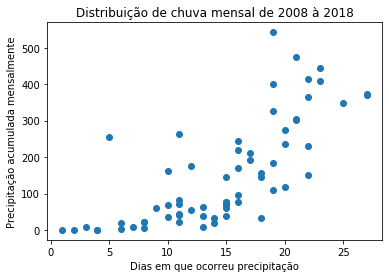

In [11]:
#Visualizando relação dos dados
plt.scatter(dataSetPrec["NumDiasPrecipitacao"], dataSetPrec["PrecipitacaoTotal"])
plt.title("Distribuição de chuva mensal de 2008 à 2018")
plt.xlabel("Dias em que ocorreu precipitação")
plt.ylabel("Precipitação acumulada mensalmente")
plt.show()

In [12]:
#Importando biblioteca para trabalhar com KMeans
from sklearn.cluster import KMeans

<h3> Documentação para a biblioteca: 
    
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [13]:
#Modelagem computacional com KMeans
kmeans = KMeans(n_clusters = 2, random_state = 5)

In [14]:
#Modelando e guardando resultados na variável "results"
results = kmeans.fit_predict(dataSetPrec)

In [15]:
#Visualizando quais são os centróides dos clusters obtidos na modelagem
centroides = kmeans.cluster_centers_
print(centroides)

[[ 12.06818182  67.61818182]
 [ 19.80952381 333.76190476]]


In [16]:
#Visualizando resultados
print(results)

[0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1]


In [17]:
#Mostrando um dos grupos de dados obtidos
dataSetPrec[results == 0]

,NumDiasPrecipitacao,PrecipitacaoTotal
0,15.0,69.2
1,8.0,22.4
8,15.0,37.8
9,18.0,31.8
10,7.0,9.5
11,1.0,0.4
12,10.0,162.1
20,15.0,76.7
21,4.0,1.0
22,8.0,6.7


In [18]:
#Mostrando o outro grupo de dados obtido
dataSetPrec[results == 1]

,NumDiasPrecipitacao,PrecipitacaoTotal
2,20.0,275.5
3,23.0,409.3
4,17.0,212.3
5,19.0,542.3
6,21.0,473.3
7,19.0,401.3
13,16.0,245.4
14,16.0,220.6
15,22.0,364.3
16,27.0,372.3


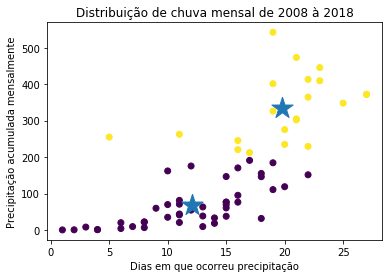

In [19]:
#Visualizando relação dos dados
plt.scatter(dataSetPrec["NumDiasPrecipitacao"], dataSetPrec["PrecipitacaoTotal"], c = results)
plt.scatter(centroides[:,0], centroides[:,1], marker = "*", s = 500)
plt.title("Distribuição de chuva mensal de 2008 à 2018")
plt.xlabel("Dias em que ocorreu precipitação")
plt.ylabel("Precipitação acumulada mensalmente")
plt.show()

<font size="5" color="black"> Um Jupyter-Notebook escrito por <b> Gilvandro César de Medeiros </b> sob a orientação do Professor <b> Orivaldo Vieira de Santana Junior </b> </font>
<br> Contatos:
<br> Links para Github
<br> Gilvandro - https://github.com/gilvandrocesardemedeiros
<br> Orivaldo - https://github.com/orivaldosantana
<br> Link para Linkedin 
<br> Gilvandro - https://www.linkedin.com/in/gilvandromedeiros/